In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

/Users/eromoegbejule/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
!head -n 5 neiss2017.tsv

In [3]:
df = pd.read_csv("neiss2017.tsv", sep="\t", encoding="latin-1")
df.head(2)

/Users/eromoegbejule/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [4]:
df.shape

(386907, 19)

In [5]:
df[df.Other_Race == 'NaN']

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [6]:
#For missing data, use either
# df[df.Other_Race.isna()]
# df[df.Other_Race.isnull()]
df.Other_Race.isna().head()

0    True
1    True
2    True
3    True
4    True
Name: Other_Race, dtype: bool

In [7]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [8]:
#Find the row where age is C
df.Age == 'C'

0         False
1         False
2         False
3         False
4         False
          ...  
386902    False
386903    False
386904    False
386905    False
386906    False
Name: Age, Length: 386907, dtype: bool

In [9]:
df[df.Age == 'C']

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.Treatment_Date.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
386902    False
386903    False
386904    False
386905    False
386906    False
Name: Treatment_Date, Length: 386907, dtype: bool

In [11]:
df[df.Treatment_Date.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.Treatment_Date.isna().value_counts()

False    386906
True          1
Name: Treatment_Date, dtype: int64

In [13]:
df.dropna()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
188,170106886,01/02/2017,4,1,3.0,HISPANIC,38.0,71.0,PENILE PAIN,1.0,0.0,0.0,649.0,0.0,4YOM DROPPED A TOILET SEAT ON HIS PENIS 2 MONT...,DISCHARGE AND PAIN FOR 3 DAYS; PENILE PAIN AND...,C,8.0,4.7570
203,170106905,01/02/2017,4,1,3.0,MULTI-RACIAL,36.0,71.0,LEG PAIN,1.0,0.0,0.0,1205.0,0.0,4YOM WITH BILATERAL LEG PAIN AFTER PLAYING BAS...,PAIN,C,8.0,4.7570
215,170106920,01/01/2017,22,1,3.0,MULTI-RACIAL,37.0,71.0,PAIN,1.0,9.0,0.0,1205.0,0.0,"22 YOM INJURED ANKLE,FOOT,PLAYING BASKETBALL. ...","PAIN,ACUTE RIGHT FOOT PAIN",M,78.0,87.0904
1079,170113428,01/01/2017,5,1,3.0,HISPANIC,92.0,71.0,CELLULITIS,1.0,0.0,0.0,1893.0,0.0,"*5YOM,1WK AGO SISTER SLAMMED DOOR ON FINGER,KN...","R,DX:CELL FINGER",M,24.0,87.0904
1089,170113453,01/02/2017,50,1,3.0,HISPANIC,79.0,71.0,PAIN,1.0,9.0,0.0,3255.0,1206.0,"*50YOM,ICE SKATING FELL FWD THEN BOWLING DEVEL...",IN,M,24.0,87.0904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386556,180236062,12/27/2017,18,1,3.0,HISPANIC,32.0,71.0,EFFUSION,1.0,0.0,0.0,557.0,1842.0,18YOM FELL WHILE TRYING TO INSTALL VIDEO GAME ...,WN 4 STAIRS LANDED ON LEFT ELBOW NO FX DX LEFT...,C,10.0,4.7570
386560,180236068,12/27/2017,202,1,3.0,HISPANIC,87.0,71.0,NS,1.0,0.0,0.0,1519.0,0.0,"2MOM CARRIED BY MOM IN CAR SEAT, MOM FELL AND ...","ABY NOT EJECTED, STAYED ASLEEP NO INJURY DX WO...",C,10.0,4.7570
386568,180236087,12/28/2017,6,1,3.0,HISPANIC,80.0,71.0,INJURY,1.0,0.0,0.0,679.0,1807.0,6YOM JUMPED FROM SOFA LANDED ON HARD FLOOR NO ...,RY/,C,10.0,4.7570
386782,180246377,12/16/2017,4,2,3.0,UNKNOWN,87.0,71.0,WELL BABY,1.0,1.0,0.0,1842.0,1615.0,4YOF WEAR' BRO'S BOOTS FELL DOWN 15 STAIRS IN ...,ND SINCE EVENT: DX WELL BABY,V,67.0,16.9919


In [14]:
#Drop only rows where Treamtent_Date is missing
# Make sure you update df with your filtered dataset
df.dropna(subset=['Treatment_Date'])

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386902,180309762,12/30/2017,2,2,1.0,NaN,85.0,68.0,NaN,4.0,1.0,0.0,1931.0,0.0,2YR F INGESTED 9 OF MOTHERS GLIPIZIDE PILLS;DX...,NaN,C,20.0,4.7570
386903,180309763,12/31/2017,212,2,2.0,NaN,92.0,50.0,NaN,4.0,1.0,0.0,4076.0,0.0,"12MO F PT LYING IN BED, THERE WAS A DRIVE-BY S...",UGH WALL AND HIT PT IN BED; DX AMPUTATED THUMB,C,20.0,4.7570
386904,180309764,12/31/2017,218,1,1.0,NaN,81.0,57.0,NaN,4.0,1.0,0.0,1395.0,0.0,18MO M SLIPPED ON TOY;DX FEMUR FX,NaN,C,20.0,4.7570
386905,180309765,12/31/2017,202,1,1.0,NaN,75.0,57.0,NaN,4.0,1.0,0.0,1842.0,0.0,2MO M DAD FELL ON STAIRS WHILE HOLDING BABY;DX...,NaN,C,20.0,4.7570


In [15]:
df = df.dropna(subset=['Treatment_Date'])

In [16]:
df.Age.median()

29.0

In [17]:
#Cast our Age column into being an integer
#Don't use earlier to convert C
df.Age.astype(int)

0          21
1          71
2          16
3          55
4          86
         ... 
386902      2
386903    212
386904    218
386905    202
386906      2
Name: Age, Length: 386906, dtype: int64

In [18]:
df.Age = df.Age.astype(int)

In [19]:
df.Age.mean

<bound method Series.mean of 0          21
1          71
2          16
3          55
4          86
         ... 
386902      2
386903    212
386904    218
386905    202
386906      2
Name: Age, Length: 386906, dtype: int64>

<AxesSubplot:>

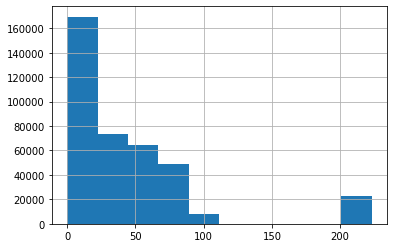

In [20]:
df.Age.hist()

<AxesSubplot:>

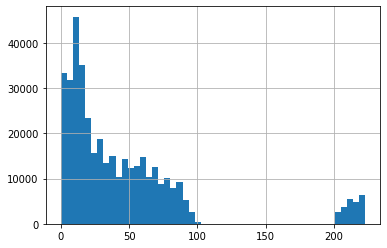

In [21]:
df.Age.hist(bins=50)

In [22]:
#We only want non-babies
df = df[df['Age'] < 200]

In [23]:
df.Sex.value_counts()

1    196180
2    167901
0         7
Name: Sex, dtype: int64

In [24]:
# Numpy does all of the math stuff for pandas
# Use np.nan any time you think you should use "NaN"
import numpy as np
df.Sex = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: np.nan
})

In [25]:
df.Sex.value_counts()

Male      196180
Female    167901
Name: Sex, dtype: int64

In [26]:
df.Sex.value_counts(dropna=False)

Male      196180
Female    167901
NaN            7
Name: Sex, dtype: int64

In [27]:
#What's the most fun?

In [28]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [29]:
df.Narrative_1.str.contains("WALL")

0         False
1         False
2         False
3         False
4         False
          ...  
386899    False
386900    False
386901     True
386902    False
386906    False
Name: Narrative_1, Length: 364088, dtype: bool

In [30]:
df[df.Narrative_1.str.contains("WALL")]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
8,170102026,01/01/2017,21,Male,1.0,NaN,82.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN...,AND,S,72.0,77.6641
36,170103980,01/01/2017,87,Female,0.0,NaN,75.0,62.0,NaN,1.0,5.0,0.0,611.0,1884.0,"87YOF CLSD HD INJ- EXIT SHOWER, FELL AGAINST W...",NaN,V,17.0,16.1828
42,170103986,01/01/2017,3,Male,0.0,NaN,75.0,59.0,NaN,1.0,1.0,0.0,1884.0,0.0,3YOM LAC HEAD- RAN INTO CORNER OF WALL,NaN,V,17.0,16.1828
48,170103993,01/01/2017,11,Female,0.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1884.0,0.0,11YOF CLSD HD INJ- FELL AGAINST WALL,NaN,V,17.0,16.1828
66,170104127,01/01/2017,91,Female,0.0,NaN,33.0,53.0,NaN,4.0,1.0,0.0,4076.0,1884.0,91 YR OLD FEMALE FELL GETTING OUT OF BED AND H...,ING FOREARMS AND ADMIT FOR CHF,V,38.0,16.1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386775,180246370,12/18/2017,4,Male,0.0,NaN,75.0,62.0,NaN,1.0,0.0,0.0,1884.0,0.0,4YOM PLAY HIT RS OF HEAD ON WALL: DX CEPHALOHE...,NaN,V,67.0,16.9919
386809,180246406,12/20/2017,52,Male,1.0,NaN,79.0,64.0,NaN,1.0,0.0,0.0,1425.0,0.0,52YOWM WALK BACKWARDS TO GET WHEELBARROW OVER ...,TAIN' WALL FELL BACKWARD ONTO PLUMB' FIXTURE L...,V,67.0,16.9919
386831,180246428,12/21/2017,17,Male,0.0,NaN,82.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,17YOM DIRECT BLOW & TRIPPIN HIT HAND ON WALL W...,OSED FX BASE OF 4TH METACARPAL/CLOSED FX HAMAT...,V,67.0,16.9919
386876,180304317,12/14/2017,33,Male,3.0,UNKNOWN,31.0,71.0,ANT CHEST WALL PN,1.0,0.0,0.0,3299.0,0.0,33YOM CHEST PN S/P PUSHUPS: DX ANT CHEST WALL PN,NaN,V,67.0,16.9919


In [31]:
df[df.Narrative_1.str.contains("WALL") & df.Narrative_1.str.contains("PUNCH")]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
170,170106272,01/02/2017,26,Female,2.0,NaN,34.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828
678,170109865,01/01/2017,26,Male,1.0,NaN,82.0,71.0,HAND PAIN,1.0,0.0,0.0,1884.0,0.0,LT HAND PAIN. 26YOM PAIN IN HAND FROM PUNCHIN...,NaN,V,95.0,16.1828
715,170110026,01/02/2017,24,Male,0.0,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,24 YOM C/O L HAND PAIN AND SWELLING AFTER PUNC...,/,M,76.0,87.0904
842,170111675,01/04/2017,23,Female,0.0,NaN,82.0,71.0,PAIN,6.0,0.0,0.0,1884.0,0.0,23YF C/O HAND PAIN P PUNCHING A WALL C CLOSED ...,>>PAIN,V,21.0,16.1828
1050,170113068,01/02/2017,23,Female,0.0,NaN,82.0,59.0,NaN,1.0,0.0,0.0,1884.0,0.0,23YOF PUNCHED A WALL W/ RIGHT HAND DX: OPEN WO...,NaN,V,35.0,16.1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385343,180155464,12/21/2017,29,Male,0.0,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,29YM C/O ON GOING HAND PAIN SINCE PUNCHING A W...,>>FX,V,21.0,16.9919
385747,180207260,12/25/2017,21,Male,0.0,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,21YM C/O HAND PAIN/SWELLING P PUNCHING A WALL ...,>>FX,V,21.0,16.9919
385817,180207651,12/27/2017,45,Male,0.0,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,45YM C/O HAND PAIN/SWELLING P PUNCHING A WALL ...,>>FX,V,21.0,16.9919
386328,180227997,12/16/2017,16,Male,1.0,NaN,82.0,57.0,NaN,1.0,5.0,0.0,1884.0,0.0,16YOM PUNCHED WALL IN ANGER AT INPATIENT PSYCH...,BOXERS FRACTURE /,C,10.0,4.7570


In [ ]:
df[df.Narrative_1.str.contains("WALL") & df.Narrative_1.str.contains("PUNCH")].to_csv("punches.")